<a href="https://colab.research.google.com/github/shaon11579/2022-spring-NLP-/blob/main/topic%20modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 

In [5]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


In [6]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
!pip install wordcloud
from wordcloud import WordCloud

In [3]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
!pip install pyLDAvis
!pip install pyLDAvis.gensim_models
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=66b90598579e72fe942db865208b105d05215d75d35dd367110585ea40cda917
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim_models (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim_models


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [8]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
#data_imdb = pd.read_csv("combined_fileUP.txt", delimiter='\t', header=None)

#data = pd.concat([data_imdb])

dataf = pd.read_fwf('/content/cleaned_file.txt')

In [15]:
dataf = pd.concat([dataf])
dataf

,IndustrialMarketingManagement89(2020)630–641
0,Contents lists available at ScienceDirect
1,Industrial Marketing Management
2,journal homepage: www.elsevier.com/locate/indm...
3,Research paper
4,B2B brands on Twitter: Engaging rs with a vary...
...,...
1118398,content of marketing-oriented journals from 19...
1118399,"Brian C. Williams (M.A., Northwestern Universi..."
1118400,"College of Business, University of Georgia."
1118401,"Christopher R. Plouffe (Ph.D., University of W..."


In [16]:
dataf.rename(columns={'IndustrialMarketingManagement89(2020)630–641':"all_paper"},inplace=True)

In [17]:
dataf.dropna(inplace=True)

In [18]:
dataf.shape

(1118388, 1)

In [ ]:
def clean_text(df):
    all_paper = list()
    lines = df["all_paper"].values.tolist()
    for text in lines:
        try: 
            text = text.lower()
        except:
            print(text)
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
    
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
#         stop_words = set(stopwords.words("english"))
#         stop_words.discard("not")
#         words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        all_paper.append(words)
    return all_paper

all_paper = clean_text(dataf)
all_paper[0:10]

In [31]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = dataf.all_paper.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['contents', 'lists', 'available', 'sciencedirect']


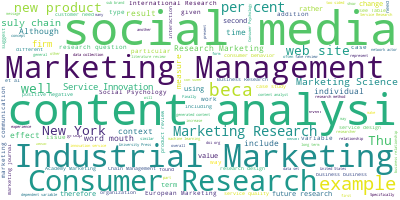

In [32]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(dataf['all_paper'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100000, contour_width=20, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [24]:
#dataf = pd.read_fwf('combined_fileUP.txt')
infile = "combined_fileUP.txt"
outfile = "cleaned_file.txt"

delete_list = ["Journal", "et al", "e.g.", "used","use", "one", "Vol", "pp"]
with open(infile) as fin, open(outfile, "w+") as fout:
    for line in fin:
        for word in delete_list:
            line = line.replace(word, "")
        fout.write(line)

FileNotFoundError: ignored

In [35]:
#Tokenize words and Clean-up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(dataf['all_paper']))

print(data_words[:1])

[['contents', 'lists', 'available', 'at', 'sciencedirect']]


In [36]:
# Creating Bigram and Trigram Models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  start_token, in_between = word, []  # treat word as both end of a phrase AND beginning of another


['contents_lists_available', 'at', 'sciencedirect']


In [40]:

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [42]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['contents_list', 'available', 'sciencedirect']]


In [43]:
# Create the Dictionary and Corpus needed for Topic Modeling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [44]:
#If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.
id2word[0]

'available'

In [45]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('available', 1), ('contents_list', 1), ('sciencedirect', 1)]]

In [ ]:
# Building the Topic Model
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [47]:
# View the topics in LDA model
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.090*"model" + 0.065*"negative" + 0.046*"word" + 0.039*"communication" + '
  '0.036*"problem" + 0.028*"strong" + 0.023*"comment" + 0.022*"estimate" + '
  '0.022*"like" + 0.020*"behavioral"'),
 (1,
  '0.088*"provide" + 0.080*"company" + 0.059*"engagement" + 0.050*"increase" + '
  '0.039*"researcher" + 0.038*"solution" + 0.028*"great" + 0.025*"science" + '
  '0.024*"post" + 0.024*"lead"'),
 (2,
  '0.088*"knowledge" + 0.044*"resource" + 0.043*"relate" + 0.032*"area" + '
  '0.026*"activity" + 0.024*"require" + 0.024*"orientation" + 0.022*"interest" '
  '+ 0.019*"contain" + 0.018*"maintain"'),
 (3,
  '0.060*"give" + 0.039*"effect" + 0.036*"follow" + 0.033*"perspective" + '
  '0.033*"text" + 0.032*"cost" + 0.028*"classification" + 0.028*"select" + '
  '0.025*"tag" + 0.021*"sell"'),
 (4,
  '0.088*"category" + 0.064*"content" + 0.053*"need" + 0.049*"method" + '
  '0.036*"publish" + 0.032*"large" + 0.031*"scale" + 0.024*"note" + '
  '0.021*"com" + 0.019*"describe"'),
 (5,
  '0.179*"bra

In [48]:
# Compute Model Perplexity and Coherence Score

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.966154412707503

Coherence Score:  0.27615884808825963


In [52]:
# Visualize the topics-keywords
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.292193  0.348552       1        1  14.475779
13     0.084169  0.029760       2        1   5.900850
12    -0.105363 -0.027990       3        1   5.732195
16    -0.056961 -0.024720       4        1   5.673466
7     -0.001860  0.000385       5        1   5.415829
5     -0.230017 -0.296967       6        1   4.839500
15     0.068145  0.046460       7        1   4.820685
4      0.096921  0.024741       8        1   4.599427
17     0.064229  0.000806       9        1   4.502392
0      0.056747  0.027662      10        1   4.406346
10     0.042983  0.009148      11        1   4.403303
11     0.072875  0.005940      12        1   4.352291
19     0.069639  0.006771      13        1   4.077999
8      0.052997  0.008709      14        1   3.970876
3      0.102934  0.017559      15        1   3.952998
14     0.105380  0.019717      16        1   3.915754
1     -0.092854 -0.078312      17        1   3.884368
18     0.069096 -0.001047      18        1   3.845866
2     -0.072094 -0.068916      19        1   3.811783
6     -0.034774 -0.048258      20        1   3.418294, topic_info=            Term          Freq         Total Category  logprob  loglift
5      marketing  51612.000000  51612.000000  Default  30.0000  30.0000
11         brand  44082.000000  44082.000000  Default  29.0000  29.0000
29      research  44587.000000  44587.000000  Default  28.0000  28.0000
527     customer  36598.000000  36598.000000  Default  27.0000  27.0000
105     consumer  34498.000000  34498.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1111       guide   1425.183709   1426.110362  Topic20  -4.8067   3.3754
3640        half   1425.164550   1426.091203  Topic20  -4.8067   3.3754
1857  oortunitie   1379.733819   1380.660472  Topic20  -4.8391   3.3754
3109      formal   1298.140995   1299.067648  Topic20  -4.9000   3.3753
3368   editorial   1285.656251   1286.582904  Topic20  -4.9097   3.3753

[632 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1788     14  0.999610   ability
1426      7  0.999521      able
1297      4  0.999754  academic
774      17  0.999554    access
1798      4  0.999471    accord
...     ...       ...       ...
151       2  0.999918      work
36       15  0.999482     world
1387      4  0.999860     would
2453     13  0.999629     write
421       1  0.999919      year

[628 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 14, 13, 17, 8, 6, 16, 5, 18, 1, 11, 12, 20, 9, 4, 15, 2, 19, 3, 7])

In [11]:
# Building LDA Mallet Model
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/content/drive/MyDrive/mallet-2.0.8' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

NameError: ignored